# Is the regridded runoff spread from the coast?

Xiao mentioned that the river runoff is spread away from the coast. Lets check if that is true for the JRA 'officially' regridded data.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filepath = '/archive/Julius.Busecke/model_forcing/JRA55-do-1-3/v20180412/padded_dataset/friver_regrid2880x2240/friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-3_gn_20160101-20170101.nc.regrid2880x2240.v20181114.padded.nc'

ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:   (IQ: 2881, JQ: 2241, i: 2880, j: 2240, time: 374)
Coordinates:
  * IQ        (IQ) float32 0.0 1.0 2.0 3.0 4.0 ... 2877.0 2878.0 2879.0 2880.0
  * JQ        (JQ) float32 0.0 1.0 2.0 3.0 4.0 ... 2237.0 2238.0 2239.0 2240.0
  * i         (i) float32 0.5 1.5 2.5 3.5 4.5 ... 2876.5 2877.5 2878.5 2879.5
  * j         (j) float32 0.5 1.5 2.5 3.5 4.5 ... 2236.5 2237.5 2238.5 2239.5
    lat       (j, i) float32 ...
    lon       (j, i) float32 ...
  * time      (time) datetime64[ns] 2015-12-28T12:00:00 ... 2017-01-04T12:00:00
Data variables:
    area      (j, i) float32 ...
    friver    (time, j, i) float32 ...
    lat_crnr  (JQ, IQ) float32 ...
    lon_crnr  (JQ, IQ) float32 ...
Attributes:
    Conventions:         CF-1.7 CMIP-6.2
    activity_id:         input4MIPs
    comment:             Based on JRA-55 reanalysis (1958-01 to 2018-01)
    contact:             Hiroyuki Tsujino (htsujino@mri-jma.go.jp)
    creation_date:       2018-04-12T01:05:54Z
    data_spec

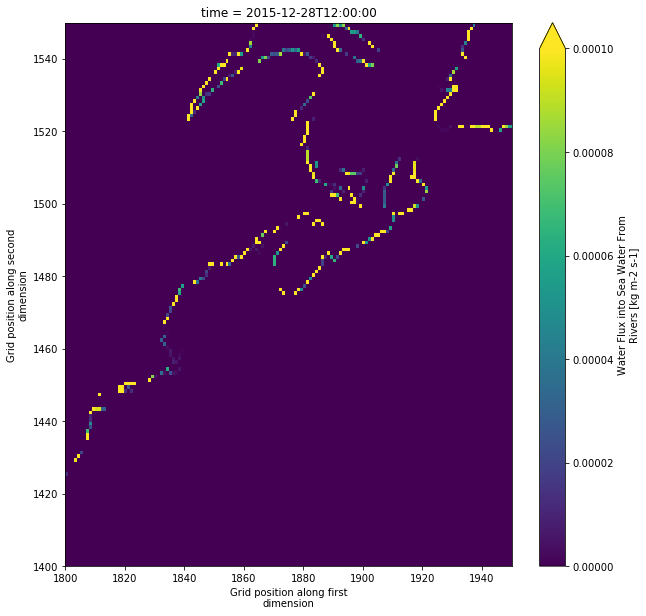

In [18]:
iroi = dict(i=slice(1800,1950), j=slice(1400,1550))
plt.figure(figsize=[10,10])
ds.friver.isel(time=0).sel(**iroi).fillna(0).plot(vmax=0.0001)